#### Manyam Avinash
#### 187233
#### Lab-7
#### Assignment-6

#### Q1 Investigate the use of Logistic Regression on a subset of the Kaggle Credit Card Fraud Data set (www.kaggle.com/dalpozz/creditcardfraud). Note that in this data set, the number of fraud data are much smaller than the normal data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import itertools

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class 0 :  284315
Class 1 :  492


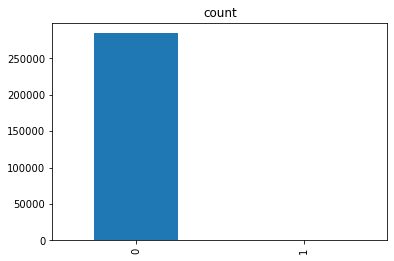

In [3]:
res=data['Class'].value_counts()
print('Class 0 : ',res[0])
print('Class 1 : ',res[1])
res.plot(kind='bar',title='count')

In [4]:
#we can observe that count of class 1 is less so we store it here
cnt=res[1]
data_0=data[data['Class']==0]
print("dimentions of data with class 0 : ",data_0.shape)
data_0.head()

dimentions of data with class 0 :  (284315, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data_1=data[data['Class']==1]
print("dimentions of data with class 0 : ",data_1.shape)
data_1.head()

dimentions of data with class 0 :  (492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


#### Logistic regression function

In [6]:
def estimate(X,Y,st):
    clf=LogisticRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
    clf.fit(X_train,Y_train)
    prediction = clf.predict(X_test)
    score = clf.score(X_test, Y_test)
    #accuracy = accuracy_score(Y_test,prediction)
    #print(prediction)
    #print("accuracy =",accuracy*100)
    matrix=confusion_matrix(Y_test,prediction)
    print(f'*************{st}***********')
    print("Accuracy is " ,score)
    plt.figure(figsize=(9,9))
    sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    

#### For 100k subset

In [7]:
# as given in the question 
# we need to consider fraud data as much as possible we consider it fully
# so we found the count of class 1 data
X1_1=data_1.iloc[:,:-1].values
X1_0=data_0.iloc[:100000-cnt,:-1].values
X1=np.concatenate((X1_1,X1_0),axis=0)
Y1_1=data_1.iloc[:,-1].values
Y1_0=data_0.iloc[:100000- cnt,-1].values
Y1=np.concatenate((Y1_1,Y1_0), axis =0)
print('size of x1 : ',X1.shape)
print('size of y1 :',Y1.shape)

size of x1 :  (100000, 30)
size of y1 : (100000,)


*************100k subset***********
Accuracy is  0.9975


C:\Users\avina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


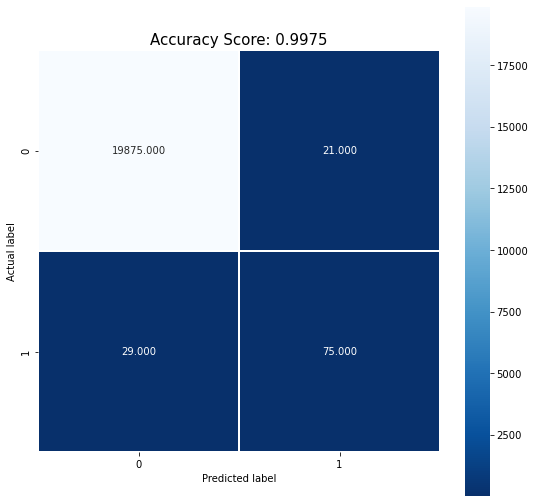

In [8]:
estimate(X1,Y1,'100k subset')

#### 20k subset

In [9]:
# as given in the question 
# we need to consider fraud data as much as possible we consider it fully
# so we found the count of class 1 data
X2_1=data_1.iloc[:,:-1].values
X2_0=data_0.iloc[:20000-cnt,:-1].values
X2=np.concatenate((X2_1,X2_0),axis=0)
Y2_1=data_1.iloc[:,-1].values
Y2_0=data_0.iloc[:20000- cnt,-1].values
Y2=np.concatenate((Y2_1,Y2_0), axis =0)
print('size of x2 : ',X2.shape)
print('size of y2 :',Y2.shape)

size of x2 :  (20000, 30)
size of y2 : (20000,)


*************20k subset***********
Accuracy is  0.98825


C:\Users\avina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


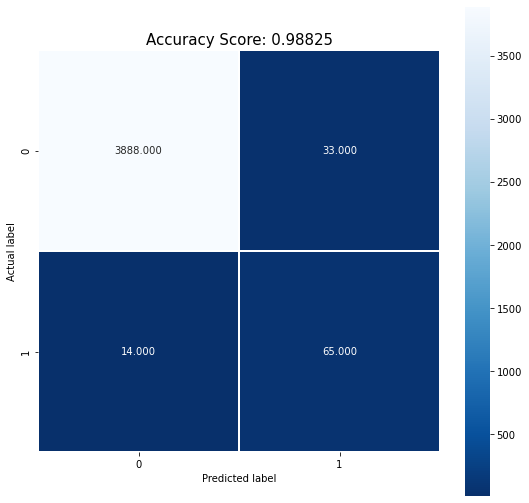

In [10]:
estimate(X2,Y2,'20k subset')

#### for 10k subset

In [11]:
# as given in the question 
# we need to consider fraud data as much as possible we consider it fully
# so we found the count of class 1 data
X3_1=data_1.iloc[:,:-1].values
X3_0=data_0.iloc[:20000-cnt,:-1].values
X3=np.concatenate((X3_1,X3_0),axis=0)
Y3_1=data_1.iloc[:,-1].values
Y3_0=data_0.iloc[:20000- cnt,-1].values
Y3=np.concatenate((Y3_1,Y3_0), axis =0)
print('size of x3 : ',X3.shape)
print('size of y3 :',Y3.shape)

size of x3 :  (20000, 30)
size of y3 : (20000,)


*************10k subset***********
Accuracy is  0.9905


C:\Users\avina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


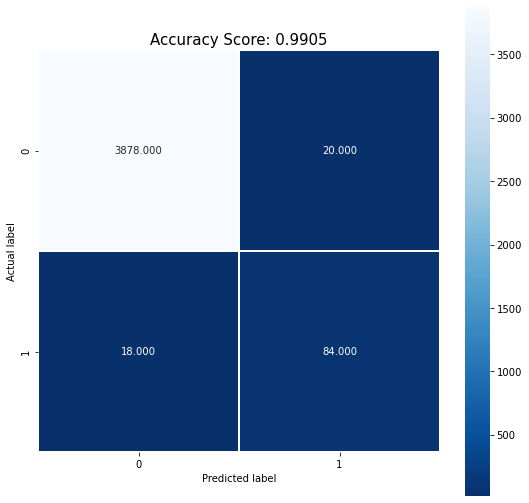

In [12]:
estimate(X2,Y2,'10k subset')

#### Q2 . Implement the logistic regression model on the Smarket.csv dataset. Use all the attribute as variables. And as output I need all the learned coefficients, and the scatter plot, and the classification graph generated by the logistic regression.

In [13]:
mdata = pd.read_csv('Smarket.csv')
mdata.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Class 0: 648
Class 1: 602
Proportion: 1.08 : 1


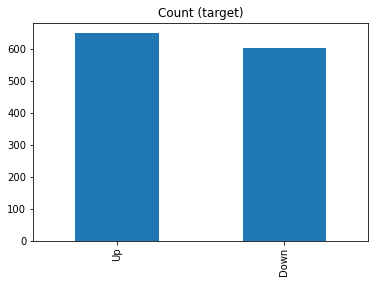

In [14]:
target_count = mdata['Direction'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
cnt= target_count[1]
target_count.plot(kind='bar', title='Count (target)');

In [15]:
label_mapping ={'Up':1, 'Down':0}
mdata['Direction']= mdata['Direction'].map(label_mapping)
mdata.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [16]:
X= mdata.iloc[:,1:-1].values
y = mdata.iloc[:,-1].values
print(X.shape)
print(y.shape)

(1250, 7)
(1250,)


In [17]:
clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)
print("The Parameters are as follows  -")
print(clf.coef_)

The Parameters are as follows  -
[[1.03606858e-04 6.84371973e-02 7.24481271e-02 2.13508540e-02
  8.12102722e-02 2.85676557e-01 8.93472435e+00]]
